# Problem statement

As the healthcare system moves toward value-based care, CMS has created many programs to improvethe quality of care of patients. One of these programs is called the Hospital Readmission ReductionProgram (HRRP), which reduces reimbursement to hospitals with above-average readmissions. For thosehospitals which are currently penalized under this program, one solution is to create interventions toprovide additional assistance to patients with increased risk of readmission. But how do we identify thesepatients? We can use predictive modeling from data science to help prioritize patients.
One patient population that is at increased risk of hospitalization and readmission is that of diabetes. Diabetesis a medical condition that affects approximately 1 in 10 patients in the United States. According to Ostling et al,patients with diabetes have almost double the chance of being hospitalized than the general population (Ostlinget al 2017).
Predict if a patient with diabetes will be readmitted to the hospital within 30 days.

# Objective

1. Explore data by Exploratory data analysis.
2. Build a machine learning model to predict if a patient with diabetes will be readmitted to the hospital within 30 days.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Reading data
data=pd.read_csv("Diabetes Re-admission.csv")
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburidemetformin,glipizidemetformin,glimepiridepioglitazone,metforminrosiglitazone,metforminpioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),[0-25),6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),[50-75),1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),[75-100),1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),[50-75),1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),[75-100),1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100766 entries, 0 to 100765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              100766 non-null  int64 
 1   patient_nbr               100766 non-null  int64 
 2   race                      100766 non-null  object
 3   gender                    100766 non-null  object
 4   age                       100766 non-null  object
 5   weight                    100766 non-null  object
 6   admission_type_id         100766 non-null  int64 
 7   discharge_disposition_id  100766 non-null  int64 
 8   admission_source_id       100766 non-null  int64 
 9   time_in_hospital          100766 non-null  int64 
 10  payer_code                100766 non-null  object
 11  medical_specialty         100766 non-null  object
 12  num_lab_procedures        100766 non-null  int64 
 13  num_procedures            100766 non-null  int64 
 14  num_

In [4]:
data['readmitted'].value_counts()

0    54233
1    46533
Name: readmitted, dtype: int64

# Data preprocessing

#####  Deleting unnecessary columns

In [5]:
data=data.drop(columns=['encounter_id','patient_nbr','payer_code'])

##### Converting categorical to continuous

In [6]:
data['race']=data['race'].map({
    'Caucasian':'1',
    'AfricanAmerican':'2',
    'Asian':'3',
    'Hispanic':'4'
})

In [7]:
data['gender']=data['gender'].map({
    'Female':'0',
    'Male':'1',
    'Unknown/Invalid':'2'
})

In [8]:
data['age']=data['age'].map({
    '[0-10)':'0',
    '[10-20)':'1',
    '[20-30)':'2',
    '[30-40)':'3',
    '[40-50)':'4',
    '[50-60)':'5',
    '[60-70)':'6',
    '[70-80)':'7',
    '[80-90)':'8',
    '[90-100)':'9'
})

In [9]:
data_medical_speciality= pd.get_dummies( data['medical_specialty'], drop_first = True, prefix = 'medical')
data_medical_speciality.head()

,medical_AllergyandImmunology,medical_Anesthesiology,medical_Anesthesiology-Pediatric,medical_Cardiology,medical_Cardiology-Pediatric,medical_DCPTEAM,medical_Dentistry,medical_Dermatology,medical_Emergency/Trauma,medical_Endocrinology,...,medical_Surgery-General,medical_Surgery-Maxillofacial,medical_Surgery-Neuro,medical_Surgery-Pediatric,medical_Surgery-Plastic,medical_Surgery-PlasticwithinHeadandNeck,medical_Surgery-Thoracic,medical_Surgery-Vascular,medical_SurgicalSpecialty,medical_Urology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data=pd.concat([data,data_medical_speciality],axis=1)
data=data.drop(columns=['medical_specialty'])

In [11]:
data['maxgluserum']=data['maxgluserum'].map({
    'None':'0', 
    '>300':'1',
    'Norm':'2',
    '>200':'3'
})

In [12]:
data['A1Cresult']=data['A1Cresult'].map({
    'None':'0', 
    '>7':'1',
    '8':'2',
    'Norm':'3'
})

In [13]:
columns=['metformin','repaglinide','nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburidemetformin', 'glipizidemetformin',
       'glimepiridepioglitazone', 'metforminrosiglitazone',
       'metforminpioglitazone']


for col in columns:
    data[col]=data[col].map({
        'No':'0',
        'Steady':'1',
        'Up':'2',
        'Down':'3'
    })

In [14]:
data['change']=data['change'].map({
    'No':'0',
    'Ch':'1'
})

In [15]:
data['diabetesMed']=data['diabetesMed'].map({
    'No':'0',
    'Yes':'1'
})

In [16]:
data['weight']=data['weight'].map({
    '[0-25)':'1',
    '[25-50)':'2',
    '[50-75)':'3',
    '[75-100)':'4',
    '[100-125)':'5',
    '[125-150)':'6',
    '[175-200)':'7',
    '[150-175)':'8',
    '>200':'9'
})

In [17]:
data=data.replace('?',np.nan)

In [18]:
data.isna().sum()

race                                        3704
gender                                         0
age                                            0
weight                                      2123
admission_type_id                              0
                                            ... 
medical_Surgery-PlasticwithinHeadandNeck       0
medical_Surgery-Thoracic                       0
medical_Surgery-Vascular                       0
medical_SurgicalSpecialty                      0
medical_Urology                                0
Length: 115, dtype: int64

In [22]:
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,medical_Surgery-General,medical_Surgery-Maxillofacial,medical_Surgery-Neuro,medical_Surgery-Pediatric,medical_Surgery-Plastic,medical_Surgery-PlasticwithinHeadandNeck,medical_Surgery-Thoracic,medical_Surgery-Vascular,medical_SurgicalSpecialty,medical_Urology
0,1,0,0,1,6,25,1,1,41,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,3,1,1,7,3,59,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2,4,1,1,7,2,11,5,...,0,0,0,0,0,0,0,0,0,0
3,1,1,3,3,1,1,7,2,44,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,4,1,1,7,1,51,0,...,0,0,0,0,0,0,0,0,0,0


##### Converting all columns to numeric

In [19]:
columns=data.columns

for i in columns:
    data[i]=pd.to_numeric(data[i])

##### Replacing missing values with mean

In [20]:
data.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures',
       ...
       'medical_Surgery-General', 'medical_Surgery-Maxillofacial',
       'medical_Surgery-Neuro', 'medical_Surgery-Pediatric',
       'medical_Surgery-Plastic', 'medical_Surgery-PlasticwithinHeadandNeck',
       'medical_Surgery-Thoracic', 'medical_Surgery-Vascular',
       'medical_SurgicalSpecialty', 'medical_Urology'],
      dtype='object', length=115)

In [21]:
col_con=['admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
        'number_outpatient','number_outpatient','number_emergency','number_inpatient','number_diagnoses']

for col in col_con:
    data[col] = data[col].replace(np.nan, data[col].mean())
    
col_cat=['race','gender','age','weight','maxgluserum','A1Cresult','metformin','repaglinide','nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburidemetformin', 'glipizidemetformin',
       'glimepiridepioglitazone', 'metforminrosiglitazone',
       'metforminpioglitazone','change','diabetesMed']

for col in col_cat:
    data[col] = data[col].replace(np.nan, data[col].median())

In [22]:
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,medical_Surgery-General,medical_Surgery-Maxillofacial,medical_Surgery-Neuro,medical_Surgery-Pediatric,medical_Surgery-Plastic,medical_Surgery-PlasticwithinHeadandNeck,medical_Surgery-Thoracic,medical_Surgery-Vascular,medical_SurgicalSpecialty,medical_Urology
0,1.0,0,0,1.0,6,25,1,1,41,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,1,3.0,1,1,7,3,59,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0,2,4.0,1,1,7,2,11,5,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,3,3.0,1,1,7,2,44,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,4,4.0,1,1,7,1,51,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data.describe()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,medical_Surgery-General,medical_Surgery-Maxillofacial,medical_Surgery-Neuro,medical_Surgery-Pediatric,medical_Surgery-Plastic,medical_Surgery-PlasticwithinHeadandNeck,medical_Surgery-Thoracic,medical_Surgery-Vascular,medical_SurgicalSpecialty,medical_Urology
count,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,...,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.00000,100766.000000,100766.000000,100766.000000,100766.000000
mean,1.261457,0.462418,6.095290,3.837445,2.027757,3.724659,5.755801,4.398676,43.100113,1.339648,...,0.030496,0.000109,0.004644,0.000079,0.000407,0.00001,0.001062,0.005289,0.000308,0.006788
std,0.569835,0.498648,1.594105,0.502120,1.447976,5.292776,4.072145,2.986665,19.656306,1.704756,...,0.171950,0.010448,0.067992,0.008910,0.020167,0.00315,0.032569,0.072537,0.017537,0.082110
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,5.000000,4.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,6.000000,4.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,7.000000,4.000000,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,4.000000,2.000000,9.000000,9.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


# EDA

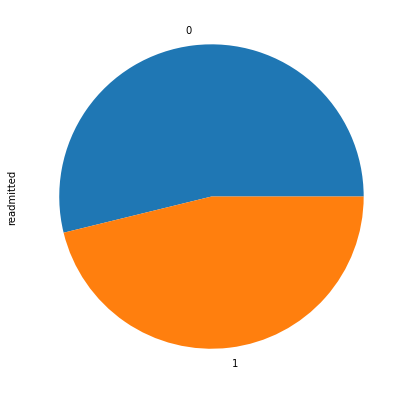

In [24]:
plt.figure(figsize=(7,7))
data["readmitted"].value_counts().plot.pie()
plt.show()

<AxesSubplot:xlabel='race', ylabel='count'>

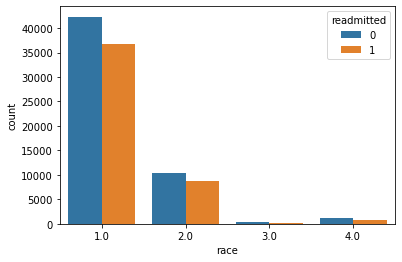

In [29]:
sb.countplot(x ='race', hue = "readmitted", data = data)

<AxesSubplot:xlabel='gender', ylabel='count'>

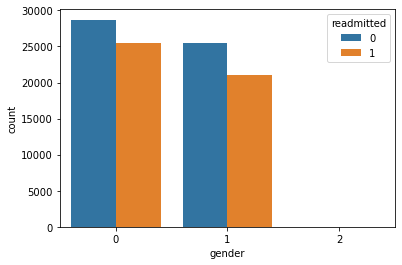

In [30]:
sb.countplot(x ='gender', hue = "readmitted", data = data)

<AxesSubplot:xlabel='age', ylabel='count'>

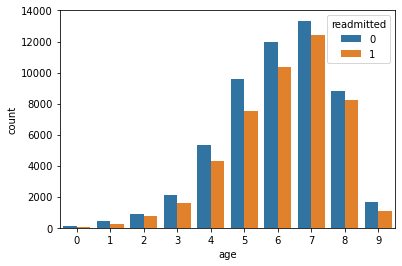

In [31]:
sb.countplot(x ='age', hue = "readmitted", data = data)

<AxesSubplot:xlabel='maxgluserum', ylabel='count'>

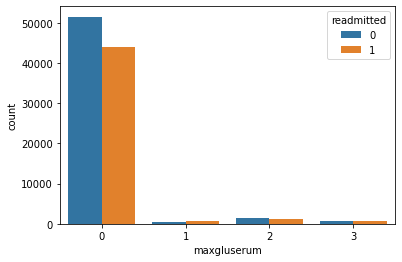

In [32]:
sb.countplot(x ='maxgluserum', hue = "readmitted", data = data)

<AxesSubplot:xlabel='A1Cresult', ylabel='count'>

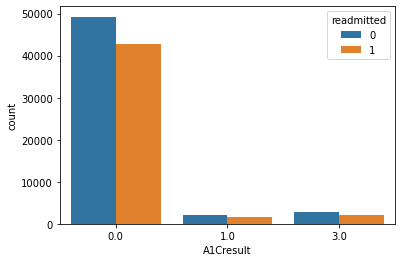

In [33]:
sb.countplot(x ='A1Cresult', hue = "readmitted", data = data)

<AxesSubplot:xlabel='change', ylabel='count'>

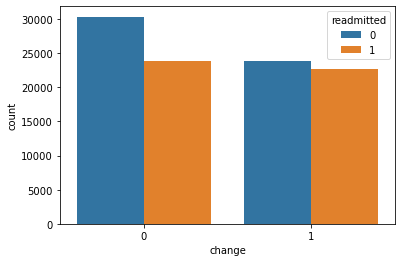

In [34]:
sb.countplot(x ='change', hue = "readmitted", data = data)

<AxesSubplot:xlabel='diabetesMed', ylabel='count'>

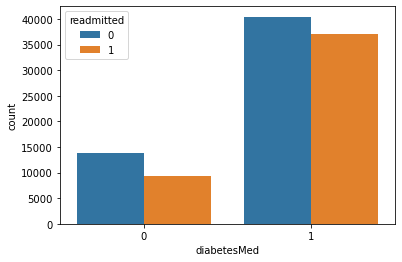

In [35]:
sb.countplot(x ='diabetesMed', hue = "readmitted", data = data)

<AxesSubplot:xlabel='time_in_hospital', ylabel='Count'>

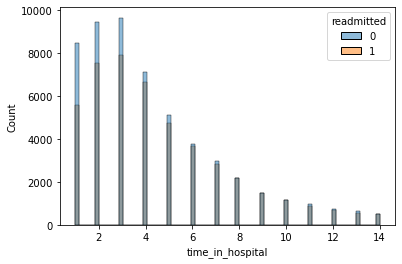

In [25]:
sb.histplot(x='time_in_hospital',hue='readmitted',data=data)

<AxesSubplot:xlabel='num_lab_procedures', ylabel='Count'>

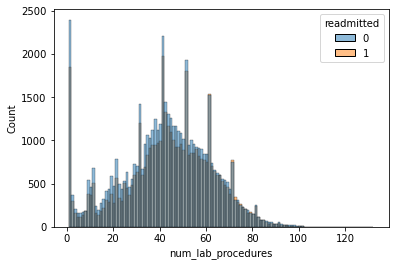

In [26]:
sb.histplot(x='num_lab_procedures',hue='readmitted',data=data)

<AxesSubplot:xlabel='num_medications', ylabel='Count'>

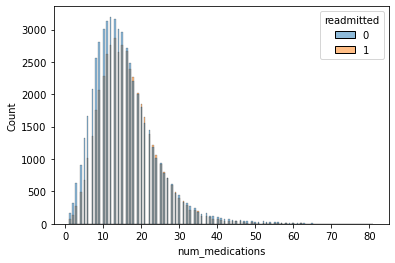

In [27]:
sb.histplot(x='num_medications',hue='readmitted',data=data)

<AxesSubplot:xlabel='number_diagnoses', ylabel='Count'>

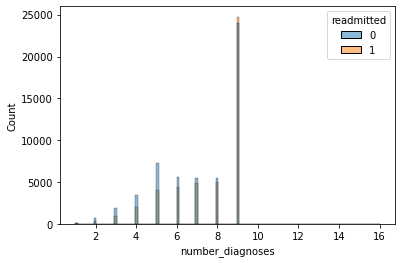

In [30]:
sb.histplot(x='number_diagnoses',hue='readmitted',data=data)

#### Removing Skewness

In [36]:
from scipy.stats import skew
df_columns= data.columns

for col in df_columns:
    print(col)
    print(skew(data[col]))

race
2.7184435255013746
gender
0.15147530728627326
age
-0.6303189026534384
weight
-0.5070275119745423
admission_type_id
1.5864289197673551
discharge_disposition_id
2.555391569932755
admission_source_id
1.0311372532658873
time_in_hospital
1.1325718979243111
num_lab_procedures
-0.23632264482591994
num_procedures
1.3155101066407642
num_medications
1.3276640674387679
number_outpatient
8.799257698784091
number_emergency
23.035678108869124
number_inpatient
3.609606185681003
number_diagnoses
-0.8788395058820196
maxgluserum
4.685353622562609
A1Cresult
3.74091517585761
metformin
2.4215816512926813
repaglinide
10.43207902345677
nateglinide
14.33450568224014
chlorpropamide
41.207528175615124
glimepiride
5.649159308997179
acetohexamide
317.43188247232496
glipizide
3.458317717200323
glyburide
3.8955388019521826
tolbutamide
66.16744413294437
pioglitazone
4.1966232562723365
rosiglitazone
4.424438418952312
acarbose
20.94615919375239
miglitol
75.0245641239394
troglitazone
183.26392633696196
tolazamide


In [3]:
def log_transform(sample_data):
    return np.log(sample_data+1)

In [38]:
def cuberoot_transform(sample_data):
    return np.cbrt(sample_data)

In [39]:
columns_positive=['time_in_hospital','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient',]
columns_negative=['num_lab_procedures','number_diagnoses']

for col_pos in columns_positive:
    data[col_pos] = data[col_pos].map(log_transform)

for col_neg in columns_negative:
    data[col_neg] = data[col_neg].map(cuberoot_transform)


##### Dividing data

In [40]:
x=data.drop('readmitted',axis=1)
y=data['readmitted']

##### Using SMOTE to remove imbalancedness in data

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    54233
1    54233
Name: readmitted, dtype: int64

##### Standerdizing the variables

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(x_sm,y_sm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass copy=        race  gender  age  weight  admission_type_id  \
0        1.0       0    0     1.0                  6   
1        1.0       0    1     3.0                  1   
2        2.0       0    2     4.0                  1   
3        1.0       1    3     3.0                  1   
4        1.0       1    4     4.0                  1   
...      ...     ...  ...     ...                ...   
108461   1.0       0    5     4.0                  1   
108462   2.0       1    4     4.0                  1   
108463   1.0       0    7     4.0                  3   
108464   1.0       0    7     4.0                  1   
108465   1.0       0    7     4.0                  3   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             25                    1          0.693147   
1                              1                    7          1.386294   
2 

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,random_state=0,test_size=0.80)

# Model building

##### Logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression as LogReg
logreg=LogReg()

logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
train_predict = logreg.predict(x_train)
train_predict

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [46]:
from sklearn.metrics import f1_score
k = f1_score(train_predict, y_train)
print('Training f1_score', k )

Training f1_score 0.5962962962962963


In [43]:
test_predict = logreg.predict(x_test)
k = f1_score(test_predict, y_test)
print('Test f1_score    ', k )

Test f1_score     0.5930199727476951


##### XGBOOST Classifier

In [47]:
import xgboost as xgb

In [48]:
model=xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=6,estimators=500)

In [49]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              estimators=500, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred=model.predict(x_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
confusion_matrix(y_test,y_pred)

array([[29870, 13662],
       [15902, 27339]], dtype=int64)

In [53]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67     45772
           1       0.63      0.67      0.65     41001

    accuracy                           0.66     86773
   macro avg       0.66      0.66      0.66     86773
weighted avg       0.66      0.66      0.66     86773



##### Artificial neural network

In [54]:
x_train.shape

(21693, 114)

In [55]:
import tensorflow as tf
from tensorflow import keras

In [57]:
model=keras.Sequential([
    keras.layers.Dense(114,input_shape=(114,),activation='relu'),
    keras.layers.Dense(57,activation='relu'),
    keras.layers.Dense(27,activation='relu'),
    keras.layers.Dense(13,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
678/678 [==============================] - 1s 642us/step - loss: 0.6649 - accuracy: 0.5935
Epoch 2/100
678/678 [==============================] - 0s 608us/step - loss: 0.6506 - accuracy: 0.6144
Epoch 3/100
678/678 [==============================] - 0s 713us/step - loss: 0.6420 - accuracy: 0.6233
Epoch 4/100
678/678 [==============================] - 1s 860us/step - loss: 0.6393 - accuracy: 0.6277
Epoch 5/100
678/678 [==============================] - 0s 704us/step - loss: 0.6345 - accuracy: 0.6289
Epoch 6/100
678/678 [==============================] - 0s 624us/step - loss: 0.6326 - accuracy: 0.6335
Epoch 7/100
678/678 [==============================] - 0s 726us/step - loss: 0.6285 - accuracy: 0.6382
Epoch 8/100
678/678 [==============================] - 0s 704us/step - loss: 0.6278 - accuracy: 0.6391
Epoch 9/100
678/678 [==============================] - 0s 664us/step - loss: 0.6244 - accuracy: 0.6405
Epoch 10/100
678/678 [==============================] - 0s 676us/step - l

In [58]:
yp=model.predict(x_test)
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59     43532
           1       0.59      0.59      0.59     43241

    accuracy                           0.59     86773
   macro avg       0.59      0.59      0.59     86773
weighted avg       0.59      0.59      0.59     86773



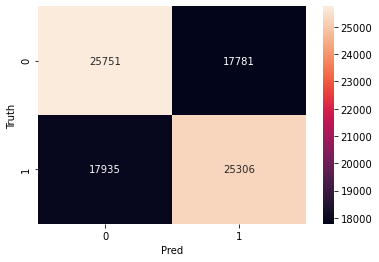

In [60]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Pred')
plt.ylabel('Truth');

##### Naive Bayes classifier

In [61]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train , y_train)
y_pred = naive_bayes.predict(x_test)


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65     43532
           1       0.64      0.43      0.51     43241

    accuracy                           0.59     86773
   macro avg       0.60      0.59      0.58     86773
weighted avg       0.60      0.59      0.58     86773



##### SVM classifier

In [63]:
from sklearn.svm import SVC
model=SVC()

In [64]:
model.fit(x_train,y_train)

SVC()

In [65]:
model.score(x_test,y_test)

0.6223825383471817

##### Decision tree classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [67]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
y_predicted = dtree.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predicted))

0.5761584824772683


##### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

In [71]:
model=RF.fit(x_train,y_train)

In [72]:
y_prediction=model.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_prediction))

0.6459036797160407


# Insights

1. In given data, maximum patients belonging to Caucasian race got readmitted.
2. In given data, maximum patients between age 60 to 90 got readmitted.
3. Maximum number of patients who have changed their medications got readmitted.
4. In given data, patients for whom diabetes medications was prescribed got readmitted.
5. In given data, maximum patients are getting discharge within 7 days and patients who got early discharge got readmitted.
6. In given data, maximum patients are undergone 30 to 70 lab procedures.
7. In given data, patients with maximum number of medications got readmitted.
8. In given data, majority of patients undergone total 9 diagnosis.

1. Logistic regression : Classifying diabetes readmitted patients with 59% accuracy.
2. XG boost: Classifying diabetes readmitted patients with 66% accuracy.
3. ANN: Classifying diabetes readmitted patients with 59% accuracy.
4. Naive Bayses: Classifying diabetes readmitted patients with 59% accuracy.
5. SVM classifier: Classifying diabetes readmitted patients with 62% accuracy.
6. Decision tree classifier: Classifying diabetes readmitted patients with 57% accuracy.
7. Random forest: Classifying diabetes readmitted patients with 64% accuracy.

XGB classifier is classifying diabetes readmittedwith maximum accuracy